In [1]:
import numpy as np
import scipy as sp
from scipy import sparse
from scipy.sparse import linalg

import matplotlib.pyplot as plt
from IPython.display import clear_output


In [2]:
plt.rcParams['text.latex.preamble'] = r'\renewcommand{\vec}{\mathbf}'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
def get_boundary(maxes,thetas):
    K = len(thetas)
    points = np.zeros(k+1,dtype='complex_')
    for j in range(len(thetas)):
        d1 = maxes[j]
        d2 = maxes[(j+1)%k]
        t = thetas[(j+1)%k]-thetas[j]
        points[j] = np.exp(-thetas[j]*1j)*( d1 - (-d1/np.tan(t)+d2/np.sin(t))*1j )
    points[-1] = points[0]
    return points

def euclidian(A,theta):
    H = (np.exp(theta*1j)*A + np.conj(np.exp(theta*1j)*A).T)/2
    return np.linalg.eigvalsh(H)[-1]
v_euclidian = np.vectorize(euclidian,excluded=['A'])

In [4]:
np.random.seed(0)

Ns = [100,500]

k=100
euclidian_points = np.zeros((len(Ns),k+1),dtype='complex')
λ = []

for l,N in enumerate(Ns):
    
    A = np.random.randn(N,N)+1j*np.random.randn(N,N)
    A /= np.sqrt(2*N)

    thetas = np.linspace(0,2*np.pi,k,endpoint=False)
    λ.append(np.linalg.eigvals(A))

    euclidian_maxes = v_euclidian(A=A,theta=thetas)
    euclidian_points[l] = get_boundary(euclidian_maxes,thetas)

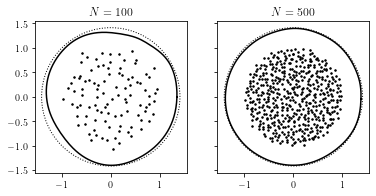

In [5]:
fig,axs = plt.subplots(1,len(Ns),figsize=(6,3),sharey=True)


for l,N in enumerate(Ns):
    
    axs[l].plot(np.real(euclidian_points[l]),np.imag(euclidian_points[l]),color='k')
    axs[l].plot(np.real(λ[l]),np.imag(λ[l]),color='k',ls='None',marker='.',ms=3)
    
    circle = plt.Circle((0, 0), np.sqrt(2),fill=False,color='k',ls=':')
    axs[l].add_patch(circle)
    
    axs[l].set_aspect('equal')
    
    axs[l].set_title(f'$N={N}$')

plt.savefig('imgs/numerical_range.pdf')